# Telecom Customer Churn Prediction
## Introduction
### What is Churn rate?
Churn Rate is a measure of the number of individuals or items moving out of a collective group over a specific period.
Customer Churn occurs when there is loss of customers or clients from the service provider especially in the telecommunications industry as the users have multiple options they can opt for in a particular area.

#### What problem am I solving here?
The dataset provides information on the customer behaviour when using the Service. Based on those insights we can know whether the customer churns or not. By training a model based on the dataset, we can predict the shortcomings of the service provider, thereby, we could suggest the service provider to improve those particular services. Thus, reducing the churn rate.

#### What's the dataset about?
The raw data contains 7043 rows (customers) and 21 columns (features). The “Churn” column is our target.

The features in the dataset indicate the different parameter of a user's behaviour. Some of the parameters include information like whether the user has a dependent, has a partner, is a senior citizen, monthly expenditure charges, has multiple lines, has Paperless billing, registration for services like OnlineBackup, Device Protection, Online Security, Phone Service, Internet Service, StreamingTv, StreamingMovies,etc...

#### Plans for solving the problem
1. Data Cleaning
2. Data Understanding
3. Feature Selection
4. Model Selection

# 1. Data Cleaning

### Importing the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


%matplotlib inline

### Reading Dataset from the CSV File

In [2]:
data=pd.read_csv("Telco Customer Churn.csv")

### Checking for any missing data in the dataset

In [3]:
print(data.isnull().any())

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool


### Getting the feature names

In [4]:
dataCol=data.columns.values
dataCol

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

### Checking the datatype of the features

In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Converting Features to Float
Since, TotalCharges feature is found to be of object type. We need to convert it to a float type.

In [6]:
z = []
for i in data['TotalCharges']:
    try:
        i = float(i)
    except:
        i = 0
    z.append([i])
    
z = np.array(z)

In [7]:
z = pd.DataFrame(z, columns=["TC"])
data['TotalCharges'] = z

### Replacing Unnecessary attributes
Reducing the number of unnecessary attributes to "NO". 
- Online Security 
- OnlineBackup 
- DeviceProtection 
- TechSupport 
- MultipleLines 
- StreamingTV
- StreamingMovies 
                                                   
For example, we know that the user cannot have access to streamingTV without access to internet service.

In [8]:
data['OnlineSecurity']=data['OnlineSecurity'].replace("No internet service","No")
data['OnlineBackup']=data['OnlineBackup'].replace("No internet service","No")
data['DeviceProtection']=data['DeviceProtection'].replace("No internet service","No")
data['TechSupport']=data['TechSupport'].replace("No internet service","No")
data['MultipleLines']=data['MultipleLines'].replace("No phone service","No")
data['StreamingTV']=data['StreamingTV'].replace("No internet service","No")
data['StreamingMovies']=data['StreamingMovies'].replace("No internet service","No")



### Converting Yes or No features to 1's or 0's

In [9]:
dataint=['StreamingTV','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','PaperlessBilling','Churn']
for i in dataint:
    data[i] = data[i]=='Yes'
    data[i] = data[i].astype(int)
data.head()
    

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


## Cleaned Data

In [10]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


#### S1- Splitting the Features
The features having more than 2 attributes are converted to respective columns using get dummies function in the pandas.

In [11]:
z = pd.get_dummies(data['InternetService'])
data = data.drop(['InternetService'], axis=1)
data = pd.concat([data,z],axis=1)
data.columns = data.columns.str.replace('No','No Internet')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic,No Internet
0,7590-VHVEG,Female,0,1,0,1,0,0,0,1,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0
1,5575-GNVDE,Male,0,0,0,34,1,0,1,0,...,0,One year,0,Mailed check,56.95,1889.50,0,1,0,0
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0
3,7795-CFOCW,Male,0,0,0,45,0,0,1,0,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0
4,9237-HQITU,Female,0,0,0,2,1,0,0,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,0


# 2. Data Understanding

### Zipping relevant features with Churn
Zipped some of the features and got the number of unique values contained in the two features.
This is done for better visualization of the data.

In [12]:
z=[]
z=list(zip(data['gender'],data['Churn']))
z = pd.DataFrame([z])
z=z.T
z=z[0].value_counts()
z


(Male, 0)      2625
(Female, 0)    2549
(Female, 1)     939
(Male, 1)       930
Name: 0, dtype: int64

- Male and Not Churn = 2625 users
- Female and Not Churn = 2549 users
- Female and Churn = 939 users
- Male and Churn = 930 users

In [13]:
z=[]
z=list(zip(data['Partner'],data['Churn']))
z = pd.DataFrame([z])
z=z.T
z=z[0].value_counts()
z

(1, 0)    2733
(0, 0)    2441
(0, 1)    1200
(1, 1)     669
Name: 0, dtype: int64

- Has Partner and Not Churn = 2733 users
- No Partner and Not Churn = 2441 users
- No Partner and Churn = 1200 users
- Has Partner and Churn = 669 users

In [14]:
z=[]
z=list(zip(data['SeniorCitizen'],data['Churn']))
z = pd.DataFrame([z])
z=z.T
z=z[0].value_counts()
z

(0, 0)    4508
(0, 1)    1393
(1, 0)     666
(1, 1)     476
Name: 0, dtype: int64

- Not SeniorCitizen and Not Churn = 4508 users
- Not SeniorCitizen and Churn = 1393 users
- SeniorCitizen and Not Churn = 666 users
- SeniorCitizen and Churn = 476 users

In [15]:
z=[]
z=list(zip(data['Dependents'],data['Churn']))
z = pd.DataFrame([z])
z=z.T
z=z[0].value_counts()
z

(0, 0)    3390
(1, 0)    1784
(0, 1)    1543
(1, 1)     326
Name: 0, dtype: int64

- No Dependents and Not Churn = 3390 users
- Has Dependents and Not Churn = 1784 users
- No Dependents and Churn = 1543 users
- Has Dependents and Churn = 326 users

# 3. Feature Selection

### Visualizing Zipped Data

### Gender and Churn

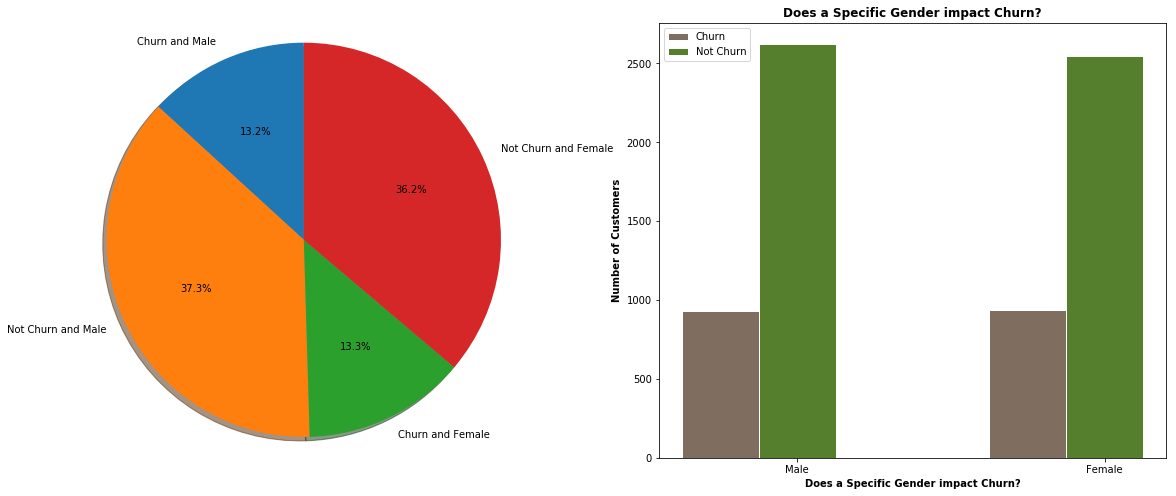

In [16]:
labels1 = 'Churn and Male','Not Churn and Male','Churn and Female','Not Churn and Female'
sizes1 = 930,2625,939,2549

fig, ax = plt.subplots(1,2,figsize=(20,8))
ax[0].pie(sizes1, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Does a Specific Gender impact Churn?",fontweight='bold')

barWidth = 0.25

# set height of bar
bars1 =[930,939]
bars2=[2625,2549]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]


 
# Make the plot
ax[1].bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Churn')
ax[1].bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Not Churn')


 
# Add xticks on the middle of the group bars
plt.xlabel('Does a Specific Gender impact Churn?', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Male','Female'])
plt.ylabel("Number of Customers", fontweight='bold')
# Create legend & Show graphic
plt.legend()

We can know that there is no significant difference in the number of churners based on gender.

### Partner and Churn

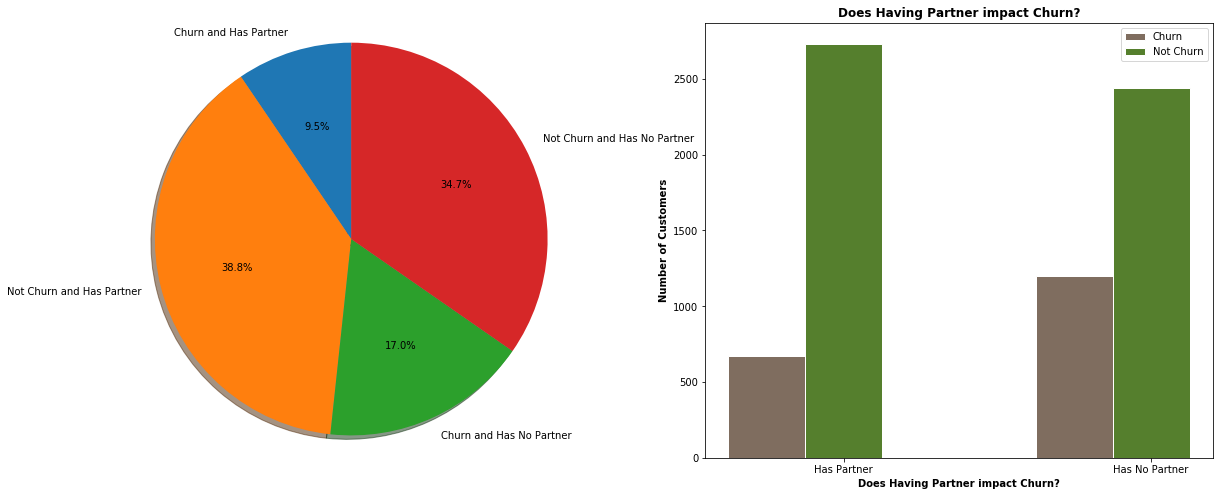

In [17]:
labels2 = 'Churn and Has Partner','Not Churn and Has Partner','Churn and Has No Partner','Not Churn and Has No Partner'
sizes2 = 669,2733,1200,2441

fig, ax = plt.subplots(1,2,figsize=(20,8))
ax[0].pie(sizes2, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Does Having Partner impact Churn?",fontweight='bold')

barWidth = 0.25

# set height of bar
bars1 =[669,1200]
bars2=[2733,2441]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]


 
# Make the plot
ax[1].bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Churn')
ax[1].bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Not Churn')


 
# Add xticks on the middle of the group bars
plt.xlabel('Does Having Partner impact Churn?', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Has Partner','Has No Partner'])
plt.ylabel("Number of Customers", fontweight='bold')
# Create legend & Show graphic
plt.legend()


No great impact of partner parameter to churn.

### SeniorCitizen and Churn

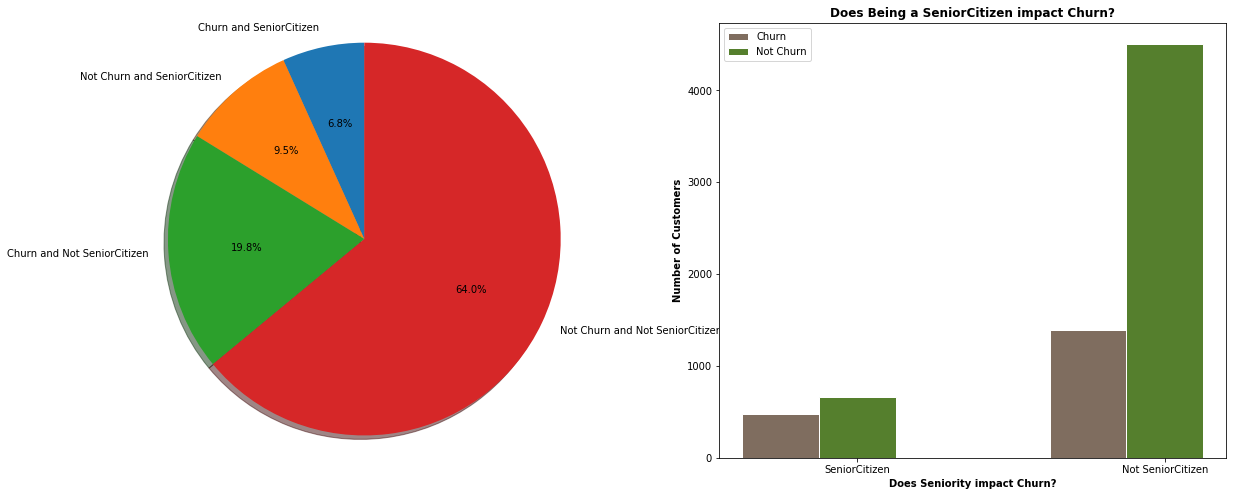

In [18]:
labels3 = 'Churn and SeniorCitizen','Not Churn and SeniorCitizen','Churn and Not SeniorCitizen','Not Churn and Not SeniorCitizen'
sizes3 = 476,666,1393,4508

fig, ax = plt.subplots(1,2,figsize=(20,8))
ax[0].pie(sizes3, labels=labels3, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Does Being a SeniorCitizen impact Churn?",fontweight='bold')

barWidth = 0.25

# set height of bar
bars1 =[476,1393]
bars2=[666,4508]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]


 
# Make the plot
ax[1].bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Churn')
ax[1].bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Not Churn')


 
# Add xticks on the middle of the group bars
plt.xlabel('Does Seniority impact Churn?', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['SeniorCitizen','Not SeniorCitizen'])
plt.ylabel("Number of Customers", fontweight='bold')
# Create legend & Show graphic
plt.legend()



There are less number of the customers who are senior citizens. Thus, most of our customers in the data are younger people.

### Dependent and Churn

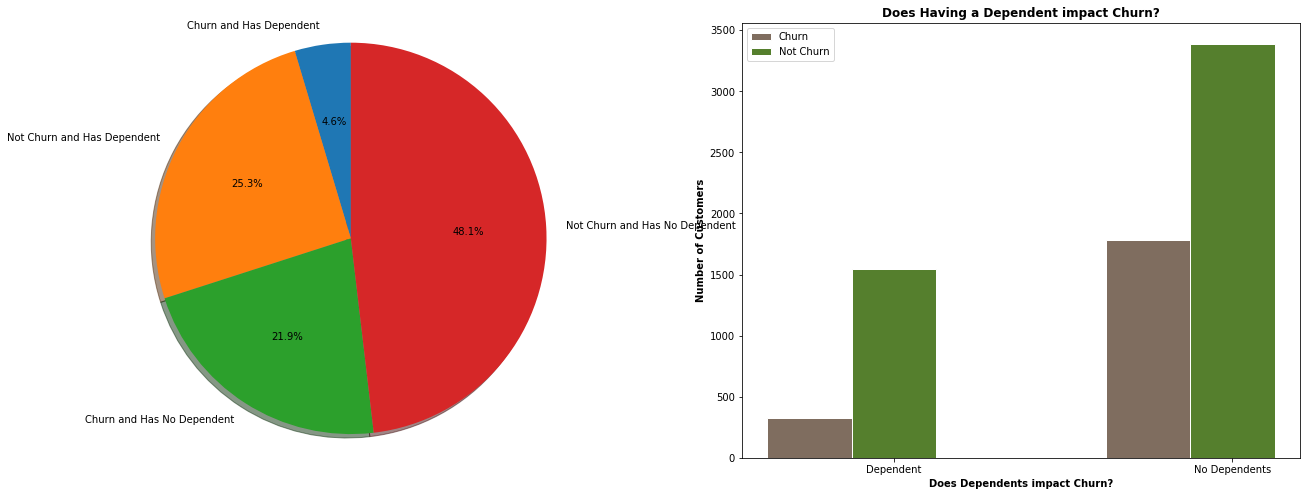

In [19]:
labels4 = 'Churn and Has Dependent','Not Churn and Has Dependent','Churn and Has No Dependent','Not Churn and Has No Dependent'
sizes4 = 326,1784,1543,3390


fig, ax = plt.subplots(1,2,figsize=(22,8))
ax[0].pie(sizes4, labels=labels4, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Does Having a Dependent impact Churn?",fontweight='bold')

barWidth = 0.25

# set height of bar
bars1 =[326,1784]
bars2=[1543,3390]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]


 
# Make the plot
ax[1].bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Churn')
ax[1].bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Not Churn')


 
# Add xticks on the middle of the group bars
plt.xlabel('Does Dependents impact Churn?', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Dependent','No Dependents'])
plt.ylabel("Number of Customers", fontweight='bold')
# Create legend & Show graphic
plt.legend()



No much impact of dependents parameter on churn.

### Contract and Churn

- Month-to-month and Not Churn = 2220 users
- Month-to-month and Churn = 1655 users
- Two year and Not Churn = 1647 users
- One year and Not Churn = 1307 users
- One year and Churn = 166 users
- Two year and Churn = 48 users

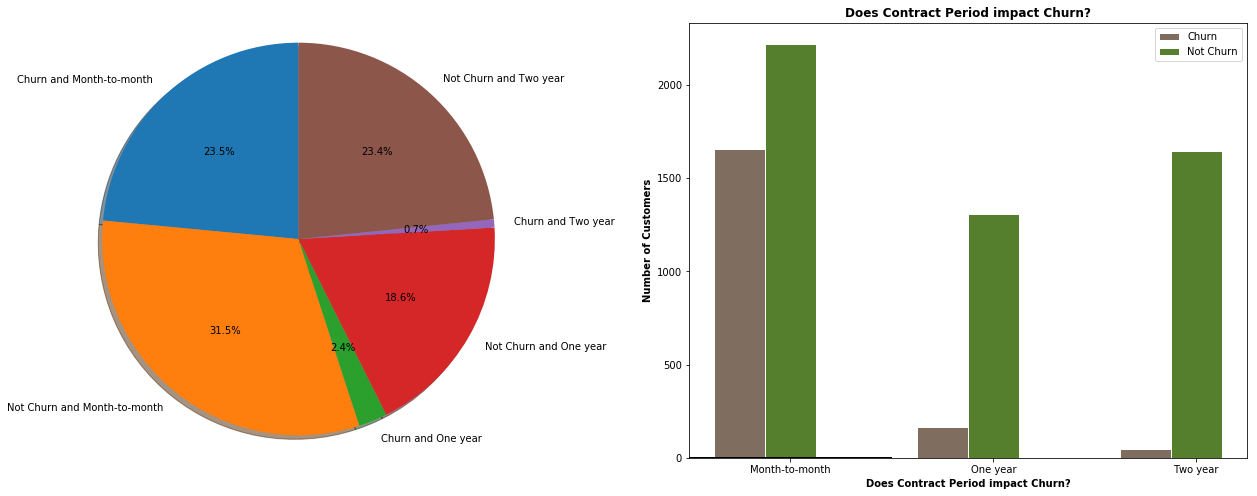

In [20]:
labels='Churn and Month-to-month','Not Churn and Month-to-month','Churn and One year','Not Churn and One year','Churn and Two year','Not Churn and Two year'
sizes=1655,2220,166,1307,48,1647
fig, ax = plt.subplots(1,2,figsize=(22,8))
ax[0].pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Does Contract Period impact Churn?",fontweight='bold')

barWidth = 0.25

# set height of bar
bars1 =[1655,166,48]
bars2=[2220,1307,1647]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]


 
# Make the plot
ax[1].bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Churn')
ax[1].bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Not Churn')


 
# Add xticks on the middle of the group bars
plt.xlabel('Does Contract Period impact Churn?', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Month-to-month','One year','Two year'])
plt.ylabel("Number of Customers", fontweight='bold')
# Create legend & Show graphic
plt.legend()
#month to month contract customer are more who churns more so company have to plan some long contract tenure


Month to month contract customer are more who churns more so company have to plan some long contract tenure.
Also, Long term users are very less likely to churn.

#### S2- Splitting the Features
The features having more than 2 attributes are converted to respective columns using get dummies function in the pandas.

In [21]:
z = pd.get_dummies(data['Contract'])
data = data.drop(['Contract'], axis=1)
data = pd.concat([data,z],axis=1)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic,No Internet,Month-to-month,One year,Two year
0,7590-VHVEG,Female,0,1,0,1,0,0,0,1,...,Electronic check,29.85,29.85,0,1,0,0,1,0,0
1,5575-GNVDE,Male,0,0,0,34,1,0,1,0,...,Mailed check,56.95,1889.50,0,1,0,0,0,1,0
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,Mailed check,53.85,108.15,1,1,0,0,1,0,0
3,7795-CFOCW,Male,0,0,0,45,0,0,1,0,...,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0,1,0
4,9237-HQITU,Female,0,0,0,2,1,0,0,0,...,Electronic check,70.70,151.65,1,0,1,0,1,0,0


In [22]:
z=[]
z=list(zip(data['PaymentMethod'],data['Churn']))
z = pd.DataFrame([z])
z=z.T
z=z[0].value_counts()
z

(Mailed check, 0)                 1304
(Electronic check, 0)             1294
(Credit card (automatic), 0)      1290
(Bank transfer (automatic), 0)    1286
(Electronic check, 1)             1071
(Mailed check, 1)                  308
(Bank transfer (automatic), 1)     258
(Credit card (automatic), 1)       232
Name: 0, dtype: int64

### Mode of Payment and Churn

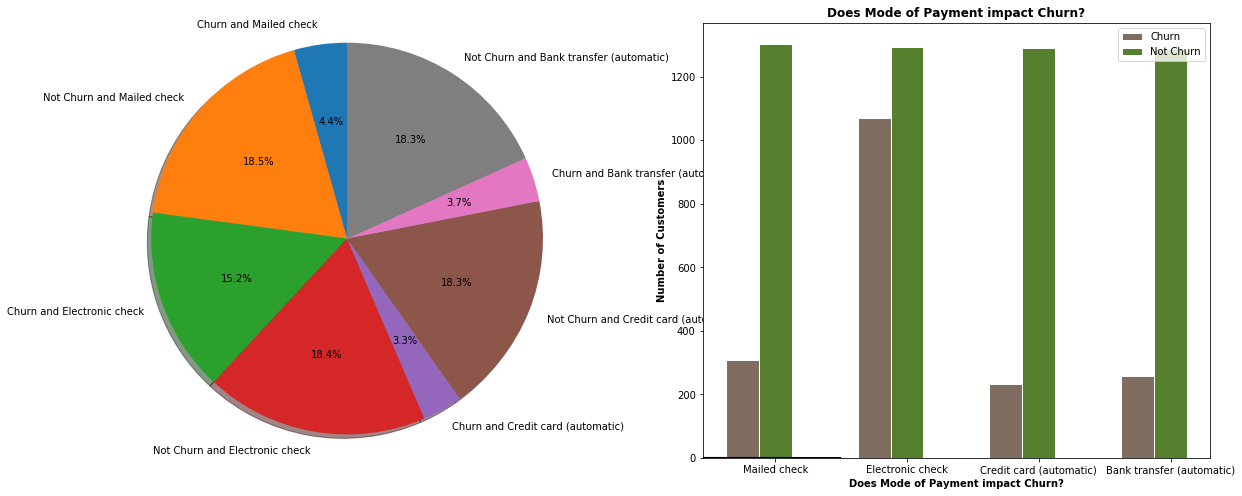

In [23]:
labels = 'Churn and Mailed check','Not Churn and Mailed check','Churn and Electronic check', 'Not Churn and Electronic check', 'Churn and Credit card (automatic)','Not Churn and Credit card (automatic)','Churn and Bank transfer (automatic)','Not Churn and Bank transfer (automatic)'
sizes = 308,1304,1071,1294,232,1290,258,1286

fig, ax = plt.subplots(1,2,figsize=(20,8))
ax[0].pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Does Mode of Payment impact Churn?",fontweight='bold')

barWidth = 0.25

# set height of bar
bars1 =[308,1071,232,258]
bars2=[1304,1294,1290,1286]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]


 
# Make the plot
ax[1].bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Churn')
ax[1].bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Not Churn')


 
# Add xticks on the middle of the group bars
plt.xlabel('Does Mode of Payment impact Churn?', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Mailed check','Electronic check','Credit card (automatic)','Bank transfer (automatic)'])
plt.ylabel("Number of Customers", fontweight='bold')
# Create legend & Show graphic
plt.legend()


Electronic check have 1071 churn and 1294 not churn(which is approx 45%/55%) so company have to encourage to opt for other payment methods to prevent churn.

#### S3- Splitting the Features
The features having more than 2 attributes are converted to respective columns using get dummies function in the pandas.

In [24]:
z = pd.get_dummies(data['PaymentMethod'])
data = data.drop(['PaymentMethod'], axis=1)
data = pd.concat([data,z],axis=1)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,DSL,Fiber optic,No Internet,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,Female,0,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,Male,0,0,0,45,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,Female,0,0,0,2,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


### Paperless Billing and Churn

In [25]:
z=[]
z=list(zip(data['PaperlessBilling'],data['Churn']))
z = pd.DataFrame([z])
z=z.T
z=z[0].value_counts()
z

(1, 0)    2771
(0, 0)    2403
(1, 1)    1400
(0, 1)     469
Name: 0, dtype: int64

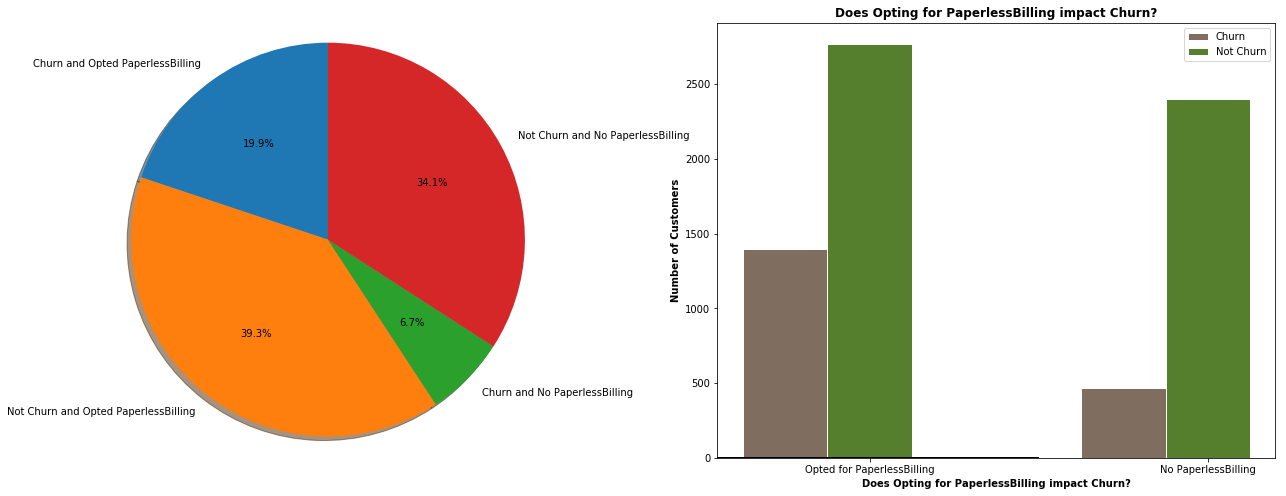

In [26]:
labels = 'Churn and Opted PaperlessBilling','Not Churn and Opted PaperlessBilling','Churn and No PaperlessBilling','Not Churn and No PaperlessBilling'
sizes = 1400,2771,469,2403


fig, ax = plt.subplots(1,2,figsize=(22,8))
ax[0].pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Does Opting for PaperlessBilling impact Churn?",fontweight='bold')

barWidth = 0.25

# set height of bar
bars1 =[1400,469]
bars2=[2771,2403]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]


 
# Make the plot
ax[1].bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Churn')
ax[1].bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Not Churn')


 
# Add xticks on the middle of the group bars
plt.xlabel('Does Opting for PaperlessBilling impact Churn?', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Opted for PaperlessBilling','No PaperlessBilling'])
plt.ylabel("Number of Customers", fontweight='bold')
# Create legend & Show graphic
plt.legend()

#469 customer have no paperless billing and churned so they might forget to pay bill and charged penalty
#1400 cusotmer have paperless billing and churned so we can conculde that they actually have service issue

469 customer have no paperless billing and churned so they might forget to pay bill and charged penalty,
1400 cusotmer have paperless billing and churned so we can conculde that they actually have service issue.

### MultipleLines and Churn

In [27]:
z=[]
z=list(zip(data['MultipleLines'],data['Churn']))
z = pd.DataFrame([z])
z=z.T
z=z[0].value_counts()
z

(0, 0)    3053
(1, 0)    2121
(0, 1)    1019
(1, 1)     850
Name: 0, dtype: int64

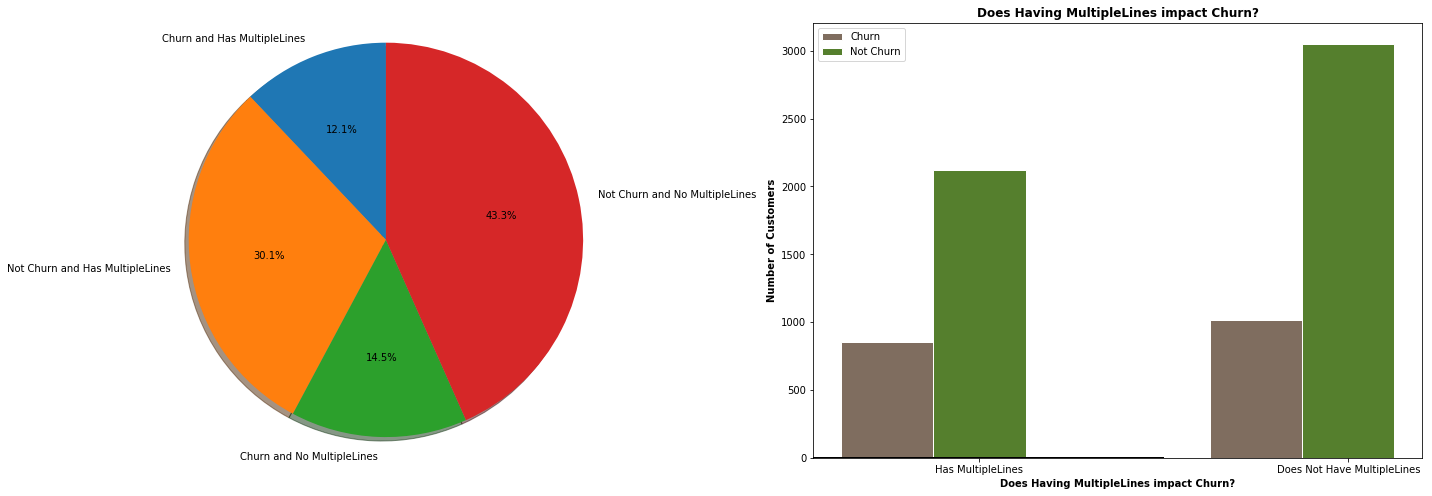

In [28]:
labels = 'Churn and Has MultipleLines','Not Churn and Has MultipleLines','Churn and No MultipleLines','Not Churn and No MultipleLines'
sizes = 850,2121,1019,3053


fig, ax = plt.subplots(1,2,figsize=(24,8))
ax[0].pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Does Having MultipleLines impact Churn?",fontweight='bold')

barWidth = 0.25

# set height of bar
bars1 =[850,1019]
bars2=[2121,3053]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]


 
# Make the plot
ax[1].bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Churn')
ax[1].bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Not Churn')


 
# Add xticks on the middle of the group bars
plt.xlabel('Does Having MultipleLines impact Churn?', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Has MultipleLines','Does Not Have MultipleLines'])
plt.ylabel("Number of Customers", fontweight='bold')
# Create legend & Show graphic
plt.legend()

#There is no great impact of having more than one connection on churn
#If Service Provider focuses on 850 customers who have muliple lines means(yes) and churned means they are more service centric customer. ServiceProvider must prevent Churning by some offering some great service

There is no great impact of having more than one connection on churn
#If Service Provider focuses on 850 customers who have muliple lines means(yes) and churned means they are more service centric customer. ServiceProvider must prevent Churning by some offering some great service.

### Plot- MonthlyCharges vs TotalCharges

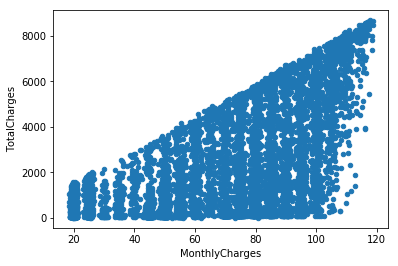

In [29]:
data[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')


We can observe that the total charges increases as the monthly bill for a customer increases. Since, they are linearly related according to the plot, we can remove one of the features.

### Dropped Features
#### - CustomerID
#### - Gender
#### - Partner
#### - Dependents
#### - MultipleLines
#### - ToatalCharges
Since these features do not have any relevance with the output as we undersood in the above mentioned analytics, we have removed it.

In [30]:
data = data.drop(['customerID','gender','Partner','Dependents','MultipleLines','TotalCharges'], axis=1)

In [31]:
data.head()

,SeniorCitizen,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,...,DSL,Fiber optic,No Internet,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,1,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,34,1,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,2,1,1,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
3,0,45,0,1,0,1,1,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,2,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0


### Finding the correlation of all features with Churn by using Pearson Correlation

Pearson Correlation is a measure of the linear correlation between two variables X and Y. It has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.
Also, I have sorted the correlation coefficients in descending order and took the absolute values of it.

In [32]:
a=[]
a=data.apply(lambda col: col.corr(data['Churn'], method='pearson'), axis=0)

a=a.abs().sort_values(ascending=False)
a

Churn                        1.000000
Month-to-month               0.405103
tenure                       0.352229
Fiber optic                  0.308020
Two year                     0.302253
Electronic check             0.301919
No Internet                  0.227890
MonthlyCharges               0.193356
PaperlessBilling             0.191825
One year                     0.177820
OnlineSecurity               0.171226
TechSupport                  0.164674
SeniorCitizen                0.150889
Credit card (automatic)      0.134302
DSL                          0.124214
Bank transfer (automatic)    0.117937
Mailed check                 0.091683
OnlineBackup                 0.082255
DeviceProtection             0.066160
StreamingTV                  0.063228
StreamingMovies              0.061382
PhoneService                 0.011942
dtype: float64

### Using Recursive Feature Elimination
It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.
It is used to select the most important features based on the Support Vector Machine Model.

In [33]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
X = data.drop(['Churn'],axis=1)
Y=data['Churn']
svm = LinearSVC()
# create the RFE model for the svm classifier 
# and select attributes
rfe = RFE(svm, 3)
rfe = rfe.fit(X,Y)
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), dataCol)))

Features sorted by their rank:
[(1, 'Contract'), (1, 'PaperlessBilling'), (1, 'TechSupport'), (2, 'StreamingTV'), (3, 'Partner'), (4, 'TotalCharges'), (5, 'StreamingMovies'), (6, 'Dependents'), (7, 'PhoneService'), (8, 'SeniorCitizen'), (9, 'OnlineSecurity'), (10, 'DeviceProtection'), (11, 'MonthlyCharges'), (12, 'PaymentMethod'), (13, 'customerID'), (14, 'tenure'), (15, 'InternetService'), (16, 'Churn'), (17, 'MultipleLines'), (18, 'OnlineBackup'), (19, 'gender')]


### Using Principal Component Analysis
Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.

Here, we use it to reduce the number of features to select. Thereby, we are aiming to get a higher accuracy by Demensioanlity reduction.

#### Standardizing the data
Standardization will transform features so that,it has zero mean and unit variance.

In [34]:
X = StandardScaler().fit_transform(X)
X

array([[-0.43991649, -1.27744458, -3.05401039, ..., -0.52504733,
         1.40641839, -0.54480692],
       [-0.43991649,  0.06632742,  0.32743831, ..., -0.52504733,
        -0.71102597,  1.83551265],
       [-0.43991649, -1.23672422,  0.32743831, ..., -0.52504733,
        -0.71102597,  1.83551265],
       ...,
       [-0.43991649, -0.87024095, -3.05401039, ..., -0.52504733,
         1.40641839, -0.54480692],
       [ 2.27315869, -1.15528349,  0.32743831, ..., -0.52504733,
        -0.71102597,  1.83551265],
       [-0.43991649,  1.36937906,  0.32743831, ..., -0.52504733,
        -0.71102597, -0.54480692]])

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=17)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)
print(principalDf.head())

         0         1         2         3         4         5         6   \
0 -1.276528 -0.996641  3.489091 -0.388532  0.021678 -1.649836  0.969325   
1 -0.888949  1.948399  1.195923  2.337854  0.201437  1.559857 -0.232770   
2 -1.215245 -0.142023  2.245421 -0.129756  0.088672  1.667821 -1.541649   
3  0.195254  3.202709  2.520872  1.561882  1.952977 -1.343258 -0.233728   
4 -0.770880 -2.914445 -0.102385 -0.193119 -0.094725 -0.212477  0.057901   

         7         8         9         10        11        12        13  \
0 -0.285555  0.044595 -1.340664 -1.863649 -0.190307  0.047071  0.684254   
1  0.236527  1.005263  0.694534  0.736117 -1.493929 -1.215317 -0.654500   
2  0.441370  1.021656 -1.638481 -0.444133 -0.710599  0.291898 -1.182356   
3 -0.340227  0.120160  1.194999  0.579801 -0.997248 -0.802333  2.217727   
4 -1.112915  0.226116 -0.679125  0.274263 -0.191796 -0.304501  0.609085   

         14        15        16  
0 -0.058044 -0.116662  0.626237  
1  0.123721  0.931306 -0.12779

In [36]:
finalDf = pd.concat([principalDf, data[['Churn']]], axis = 1)
finalDf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Churn
0,-1.276528,-0.996641,3.489091,-0.388532,0.021678,-1.649836,0.969325,-0.285555,0.044595,-1.340664,-1.863649,-0.190307,0.047071,0.684254,-0.058044,-0.116662,0.626237,0
1,-0.888949,1.948399,1.195923,2.337854,0.201437,1.559857,-0.232770,0.236527,1.005263,0.694534,0.736117,-1.493929,-1.215317,-0.654500,0.123721,0.931306,-0.127799,0
2,-1.215245,-0.142023,2.245421,-0.129756,0.088672,1.667821,-1.541649,0.441370,1.021656,-1.638481,-0.444133,-0.710599,0.291898,-1.182356,-0.044784,-0.067560,0.434877,1
3,0.195254,3.202709,2.520872,1.561882,1.952977,-1.343258,-0.233728,-0.340227,0.120160,1.194999,0.579801,-0.997248,-0.802333,2.217727,0.153516,-0.320888,-0.082696,0
4,-0.770880,-2.914445,-0.102385,-0.193119,-0.094725,-0.212477,0.057901,-1.112915,0.226116,-0.679125,0.274263,-0.191796,-0.304501,0.609085,-0.025898,0.578457,0.354896,1


### Finding Correlation of Principal Components with Churn using Spearman Correlation
Spearman Correlation is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables).
Also, I have sorted the correlation coefficients in descending order and took the absolute values of it.

In [37]:
a=[]
a=principalDf.apply(lambda col: col.corr(data['Churn'], method='spearman'), axis=0)

a=a.abs().sort_values(ascending=False)
a

1     0.497943
16    0.132049
3     0.122039
2     0.121645
15    0.071362
8     0.059520
13    0.038665
0     0.038168
4     0.037385
7     0.033701
10    0.031113
11    0.025070
9     0.019748
14    0.009590
6     0.008363
12    0.007966
5     0.004574
dtype: float64

### Finding Correlation of all features with Churn

In [38]:
data.corrwith(data['Churn'])

SeniorCitizen                0.150889
tenure                      -0.352229
PhoneService                 0.011942
OnlineSecurity              -0.171226
OnlineBackup                -0.082255
DeviceProtection            -0.066160
TechSupport                 -0.164674
StreamingTV                  0.063228
StreamingMovies              0.061382
PaperlessBilling             0.191825
MonthlyCharges               0.193356
Churn                        1.000000
DSL                         -0.124214
Fiber optic                  0.308020
No Internet                 -0.227890
Month-to-month               0.405103
One year                    -0.177820
Two year                    -0.302253
Bank transfer (automatic)   -0.117937
Credit card (automatic)     -0.134302
Electronic check             0.301919
Mailed check                -0.091683
dtype: float64

### Correlation Matrix

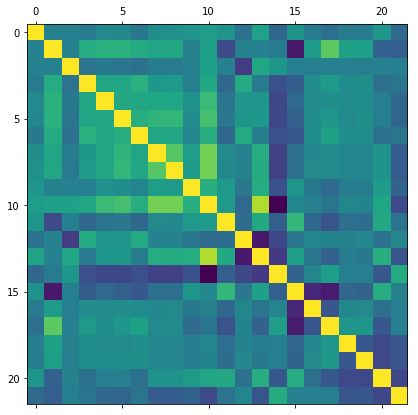

In [39]:
fig, ax = plt.subplots(figsize=(10,7))
ax.matshow(data.corr())


### Correlation Matrix with heatmap including all feature names

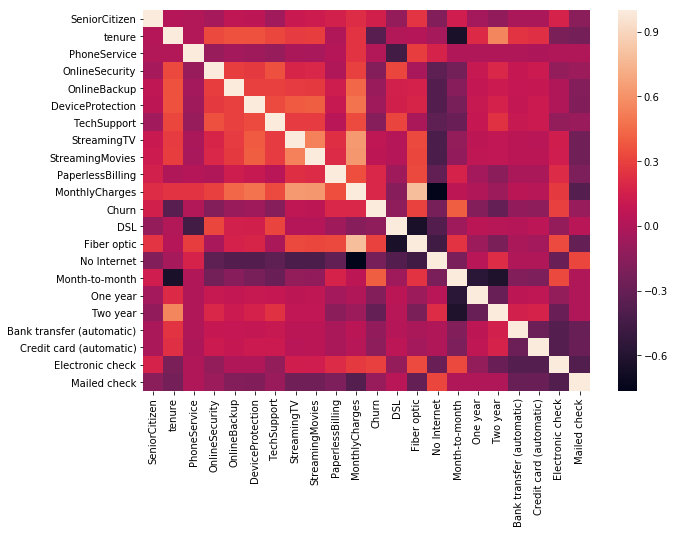

In [40]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,7))
ax=sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,)

# 4. Model Selection

### Applying Neural Network

In [41]:
import numpy as np
import tensorflow as tf
from tensorflow.python import keras
from sklearn.model_selection import train_test_split

C:\Users\chira\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [42]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.3)

In [58]:
model = keras.models.Sequential([
            keras.layers.Dense(101, activation=tf.nn.tanh, input_shape=(xtrain[0].shape), kernel_regularizer=keras.regularizers.l2(0.001)),
            keras.layers.Dense(52, activation=tf.nn.tanh),
    keras.layers.Dense(26, activation=tf.nn.tanh),
     keras.layers.Dense(17, activation=tf.nn.tanh),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [59]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.Adagrad(0.001),
             metrics=['accuracy'])

In [60]:
history  = model.fit(xtrain,ytrain,epochs=10,verbose=2, validation_split=0.2)

Train on 3944 samples, validate on 986 samples
Epoch 1/10
 - 0s - loss: 0.5508 - acc: 0.7528 - val_loss: 0.5215 - val_acc: 0.7708
Epoch 2/10
 - 0s - loss: 0.4908 - acc: 0.7868 - val_loss: 0.4963 - val_acc: 0.7911
Epoch 3/10
 - 0s - loss: 0.4691 - acc: 0.7961 - val_loss: 0.4852 - val_acc: 0.7941
Epoch 4/10
 - 0s - loss: 0.4587 - acc: 0.7964 - val_loss: 0.4805 - val_acc: 0.7951
Epoch 5/10
 - 0s - loss: 0.4529 - acc: 0.8012 - val_loss: 0.4782 - val_acc: 0.7921
Epoch 6/10
 - 0s - loss: 0.4495 - acc: 0.8017 - val_loss: 0.4770 - val_acc: 0.7880
Epoch 7/10
 - 0s - loss: 0.4472 - acc: 0.8040 - val_loss: 0.4763 - val_acc: 0.7890
Epoch 8/10
 - 0s - loss: 0.4456 - acc: 0.8050 - val_loss: 0.4760 - val_acc: 0.7921
Epoch 9/10
 - 0s - loss: 0.4444 - acc: 0.8053 - val_loss: 0.4760 - val_acc: 0.7901
Epoch 10/10
 - 0s - loss: 0.4434 - acc: 0.8055 - val_loss: 0.4761 - val_acc: 0.7911


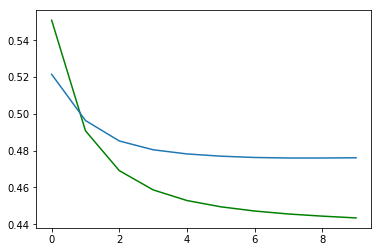

In [61]:
plt.plot(history.epoch, history.history['loss'], 'g')
plt.plot(history.epoch, history.history['val_loss'])

In [62]:
loss, accuracy = model.evaluate(xtest,ytest)

2113/2113 [==============================] - 0s 19us/step


In [63]:
print(accuracy*100)

80.26502602934217


## Applying Logistic Regression

In [49]:
model = LogisticRegression()
result = model.fit(xtrain, ytrain)

### Printing accuracy on Test Data

In [50]:
prediction_test = model.predict(xtest)
# Print the prediction accuracy
print (metrics.accuracy_score(ytest, prediction_test))

0.8017037387600567


## KNN Classifier

In [51]:
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(xtrain, ytrain)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [52]:
y_pred = classifier.predict(xtest)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

### Printing the Confusion Matrix

In [53]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(ytest, y_pred))  
print(classification_report(ytest, y_pred))  

[[1298  244]
 [ 256  315]]
             precision    recall  f1-score   support

          0       0.84      0.84      0.84      1542
          1       0.56      0.55      0.56       571

avg / total       0.76      0.76      0.76      2113



## Converting the progress to csv file

In [54]:
data.to_csv('telecom_processed.csv')

| Model Used | Accuracy |
| --- | --- |
| Neural Network | 80.2% |
| Logistic Regression | 80.17% |
| KNN Classifier | 76% |
